In [125]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
def read_data(read_file):
    df = pd.read_csv(read_file, low_memory=False, header=None)
    df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
                  "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
                  "AtStop", "HumanTime", "Day", "Hour", "JourneyGroup", "Runtime"]

#     df = pd.read_csv(read_file, low_memory=False)
    
    return df

In [190]:
def read_schedule(schedule_file):
    schedule = pd.read_csv(schedule_file, low_memory=False, encoding="ISO-8859-1")
    
    return schedule


In [191]:
def clean_df(df):
    # Dropping null values
    df = df.dropna()
    
    # Convert LineID to str
    df['LineID'] = df['LineID'].astype('str')
    
    return df


In [226]:
def clean_schedule(schedule):
    
    # drop null values
    schedule.dropna(0, inplace=True)
    
    # extract StopID
    schedule["StopID"] = schedule['stop_id'].apply(lambda x: x[-4:])
    
    # Convert StopIDs back to int
    schedule['StopID'] = schedule['StopID'].astype('int64')
    
    # Extracting LineID from trip_id
    schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')
    
    # Extracting direction from trip_id
    schedule["Direction"] = schedule['trip_id'].apply(lambda x: x[-1:])
    
    # Dropping non-major journeypatterns
    schedule = schedule[(schedule.Direction == "I") | (schedule.Direction == "O")]
    
    # Converting Direction to JourneyPatternID
    schedule["JourneyPatternID"] = schedule['Direction'].apply(lambda x: "1001" if x == "I" else "0001")
    schedule['JourneyPatternID'] = schedule['JourneyPatternID'].astype('int64')
    
#     # dropping irrelevant columns
#     for column in ['trip_id', 'stop_id', 'arrival_time', 'departure_time', 
#                    'shape_dist_traveled', 'Direction', 'stop_sequence', 'stop_headsign']:
#             schedule = schedule.drop(column, 1)
            
    # Renaming 'Long' to 'Lon'
    schedule = schedule.rename(columns={'Long': 'Lon'})
    
    return schedule

In [227]:
def get_common_stops(df, schedule, common_stops):
#     line = str(df['LineID'].iloc[0])
    line = df['LineID'].iloc[0]

    
    print(line)
    
    schedule_in = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1001)]
    schedule_out = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1)]
    df_1001 = df[df.JourneyPatternID == 1001]
    df_0001 = df[df.JourneyPatternID == 1]

    stops_in = set(schedule_in.StopID.unique())
    stops_out = set(schedule_out.StopID.unique())

    stops_1001 = set(df_1001.StopID.unique())
    stops_0001 = set(df_0001.StopID.unique())
    
    print("Difference 1001", len(stops_in ^ stops_1001))
    print("Difference 0001", len(stops_out ^ stops_0001))
    
    instops = stops_in & stops_1001
    outstops = stops_out & stops_0001

    allstops = instops | outstops
    
    print(len(allstops))
    print(len(common_stops))
    
    return (allstops | common_stops)
    

In [228]:
def save_stops(schedule, stops, write_file):
    stops = list(stops)
    schedule = schedule[['Name without locality','Name','Lat','Lon','StopID',]]
    schedule = schedule.drop_duplicates()
    schedule = schedule[schedule.StopID.isin(stops)]
    
    schedule.to_csv(write_file)

In [229]:
def main(read_directory, schedule_file, write_file):
    
    schedule = read_schedule(schedule_file)
    schedule = clean_schedule(schedule)
    
    common_stops = set()
    
    for read_file in os.listdir(read_directory):
        if read_file.endswith(".csv"):
            print("Reading", read_file, "from", read_directory)
            
            df = read_data(read_directory + read_file)
            df = clean_df(df)
            common_stops = get_common_stops(df, schedule, common_stops)
            
        print("Finished", read_file)
        print()
        
    save_stops(schedule, common_stops, write_file)

    print("Finished main!")    

In [255]:
# read_directory = "bus_data/clean_data3/"
read_directory = "bus_data/clean_location_data/"
# read_directory = "bus_data/clean_data_rough/"



schedule_file = 'bus_data/dublinbus_scheduledData2013csv.csv'
write_file = 'bus_data/static_data2/stops.csv'

main(read_directory, schedule_file, write_file)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Finished .DS_Store

Reading 1.csv from bus_data/clean_location_data/
1
Difference 1001 9
Difference 0001 6
81
0
Finished 1.csv

Reading 104.csv from bus_data/clean_location_data/
104
Difference 1001 4
Difference 0001 0
62
81
Finished 104.csv

Reading 11.csv from bus_data/clean_location_data/
11
Difference 1001 9
Difference 0001 13
118
132
Finished 11.csv

Reading 111.csv from bus_data/clean_location_data/
111
Difference 1001 11
Difference 0001 11
48
231
Finished 111.csv

Reading 114.csv from bus_data/clean_location_data/
114
Difference 1001 3
Difference 0001 4
54
279
Finished 114.csv

Reading 116.csv from bus_data/clean_location_data/
116
Difference 1001 7
Difference 0001 6
100
330
Finished 116.csv

Reading 118.csv from bus_data/clean_location_data/
118
Difference 1001 8
Difference 0001 0
34
406
Finished 118.csv

Reading 120.csv from bus_data/clean_location_data/
120
Difference 1001 15
Difference 0001 14
50
418
Finished 120.csv

Reading 123.csv from bus_data/clean_location_data/
123
Di

In [256]:
read_directory = "bus_data/clean_data3/"
# read_directory = "bus_data/clean_location_data/"
# read_directory = "bus_data/clean_data_rough/"



schedule_file = 'bus_data/dublinbus_scheduledData2013csv.csv'
write_file = 'bus_data/static_data2/stops_wrong.csv'

main(read_directory, schedule_file, write_file)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Finished .DS_Store

Reading 1.csv from bus_data/clean_data3/
1
Difference 1001 6
Difference 0001 0
81
0
Finished 1.csv

Reading 104.csv from bus_data/clean_data3/
104
Difference 1001 2
Difference 0001 31
31
81
Finished 104.csv

Reading 11.csv from bus_data/clean_data3/
11
Difference 1001 64
Difference 0001 4
58
107
Finished 11.csv

Reading 111.csv from bus_data/clean_data3/
111
Difference 1001 8
Difference 0001 9
48
155
Finished 111.csv

Reading 114.csv from bus_data/clean_data3/
114
Difference 1001 30
Difference 0001 1
27
203
Finished 114.csv

Reading 116.csv from bus_data/clean_data3/
116
Difference 1001 12
Difference 0001 8
93
229
Finished 116.csv

Reading 118.csv from bus_data/clean_data3/
118
Difference 1001 8
Difference 0001 0
34
313
Finished 118.csv

Reading 120.csv from bus_data/clean_data3/
120
Difference 1001 13
Difference 0001 13
50
325
Finished 120.csv

Reading 123.csv from bus_data/clean_data3/
123
Difference 1001 1
Difference 0001 0
90
375
Finished 123.csv

Reading 13.csv

## rough work

In [257]:
line = '16'

read_directory = "bus_data/clean_location_data/"

schedule = read_schedule(schedule_file)
schedule = clean_schedule(schedule)

df = read_data(read_directory + line + ".csv")
df = clean_df(df)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [268]:

schedule_in = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1001)]
schedule_out = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1)]
df_1001 = df[df.JourneyPatternID == 1001]
df_0001 = df[df.JourneyPatternID == 1]


stops_in = set(schedule_in.StopID.unique())
stops_out = set(schedule_out.StopID.unique())

stops_1001 = set(df_1001.StopID.unique())
stops_0001 = set(df_0001.StopID.unique())

In [269]:
print(sorted(stops_in ^ stops_1001))
print(sorted(stops_out ^ stops_0001))

[45, 205, 262, 270, 1323, 1339, 2966, 2968, 3669]
[10, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 226, 227, 228, 229, 230, 1285, 1330, 1357, 1631, 1641, 1642, 2976, 2977, 2978, 2981, 2991, 5171, 7349]


In [270]:
print(sorted(stops_in))

[10, 12, 14, 15, 17, 18, 19, 21, 85, 203, 204, 205, 215, 216, 217, 218, 219, 220, 221, 278, 320, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1347, 1348, 1349, 1350, 1352, 1353, 1354, 1355, 1357, 1359, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 2976, 2977, 2978, 2979, 2980, 2981, 2991, 2992, 5171, 7293, 7347]


In [271]:
print(sorted(stops_1001))

[10, 12, 14, 15, 17, 18, 19, 21, 45, 85, 203, 204, 215, 216, 217, 218, 219, 220, 221, 262, 270, 278, 320, 1323, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1340, 1341, 1342, 1343, 1344, 1345, 1347, 1348, 1349, 1350, 1352, 1353, 1354, 1355, 1357, 1359, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 2966, 2968, 2976, 2977, 2978, 2979, 2980, 2981, 2991, 2992, 3669, 5171, 7293, 7347]


In [272]:
print(sorted(stops_out))

[44, 45, 46, 47, 48, 49, 50, 51, 52, 119, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 262, 270, 336, 1279, 1282, 1284, 1285, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1320, 1321, 1322, 1323, 1324, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 2966, 2967, 2968, 2969, 2970, 2971, 2975, 3669, 4432, 4456, 5051, 5052, 5053, 7068, 7347, 7349]


In [273]:
print(sorted(stops_0001))

[10, 44, 45, 46, 47, 48, 49, 50, 51, 52, 119, 214, 231, 232, 233, 234, 235, 236, 237, 262, 270, 336, 1279, 1282, 1284, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1320, 1321, 1322, 1323, 1324, 1330, 1357, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 2966, 2967, 2968, 2969, 2970, 2971, 2975, 2976, 2977, 2978, 2981, 2991, 3669, 4432, 4456, 5051, 5052, 5053, 5171, 7068, 7347]


In [ ]:
# 10, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 226, 227, 228, 229, 230, 1285, 1330, 1357, 1631, 1641, 1642, 2976, 2977, 2978, 2981, 2991, 5171, 7349

In [264]:
schedule_out

trip_id arrival_time departure_time       stop_id  \
72410   11102.2213.0-16-b12-1.158.O     06:30:00       06:30:00  8240DB007347   
72411   11102.2213.0-16-b12-1.158.O     06:31:58       06:31:58  8240DB003669   
72412   11102.2213.0-16-b12-1.158.O     06:33:06       06:33:06  8240DB007349   
72413   11102.2213.0-16-b12-1.158.O     06:34:30       06:34:30  8240DB001631   
72414   11102.2213.0-16-b12-1.158.O     06:34:53       06:34:53  8240DB001632   
72415   11102.2213.0-16-b12-1.158.O     06:35:22       06:35:22  8240DB005053   
72416   11102.2213.0-16-b12-1.158.O     06:35:51       06:35:51  8240DB001633   
72417   11102.2213.0-16-b12-1.158.O     06:37:00       06:37:00  8240DB001634   
72418   11102.2213.0-16-b12-1.158.O     06:37:20       06:37:20  8240DB001635   
72419   11102.2213.0-16-b12-1.158.O     06:38:00       06:38:00  8240DB001636   
72420   11102.2213.0-16-b12-1.158.O     06:39:00       06:39:00  8240DB001637   
72421   11102.2213.0-16-b12-1.158.O     06:40:00       06:40:00  8240DB001638   
72422   11102.2213.0-16-b12-1.158.O     06:42:00       06:42:00  8220DB001639   
72423   11102.2213.0-16-b12-1.158.O     06:43:00       06:43:00  8220DB001640   
72424   11102.2213.0-16-b12-1.158.O     06:43:15       06:43:15  8220DB000231   
72425   11102.2213.0-16-b12-1.158.O     06:43:46       06:43:46  8220DB000232   
72426   11102.2213.0-16-b12-1.158.O     06:44:00       06:44:00  8220DB000233   
72427   11102.2213.0-16-b12-1.158.O     06:44:47       06:44:47  8220DB000234   
72428   11102.2213.0-16-b12-1.158.O     06:46:06       06:46:06  8220DB000235   
72429   11102.2213.0-16-b12-1.158.O     06:46:49       06:46:49  8220DB000236   
72430   11102.2213.0-16-b12-1.158.O     06:49:01       06:49:01  8220DB000237   
72431   11102.2213.0-16-b12-1.158.O     06:50:00       06:50:00  8220DB000213   
72432   11102.2213.0-16-b12-1.158.O     06:50:39       06:50:39  8220DB000214   
72433   11102.2213.0-16-b12-1.158.O     06:51:18       06:51:18  8220DB004432   
72434   11102.2213.0-16-b12-1.158.O     06:52:00       06:52:00  8220DB000119   
72435   11102.2213.0-16-b12-1.158.O     06:52:47       06:52:47  8220DB000044   
72436   11102.2213.0-16-b12-1.158.O     06:54:00       06:54:00  8220DB000045   
72437   11102.2213.0-16-b12-1.158.O     06:54:55       06:54:55  8220DB000046   
72438   11102.2213.0-16-b12-1.158.O     06:56:00       06:56:00  8220DB000047   
72439   11102.2213.0-16-b12-1.158.O     06:56:49       06:56:49  8220DB000048   
...                             ...          ...            ...           ...   
641107   5281.2199.0-16-b12-1.158.O     21:11:00       21:11:00  8220DB001291   
641108   5281.2199.0-16-b12-1.158.O     21:11:50       21:11:50  8220DB001292   
641109   5281.2199.0-16-b12-1.158.O     21:12:37       21:12:37  8220DB001293   
641110   5281.2199.0-16-b12-1.158.O     21:13:14       21:13:14  8220DB001294   
641111   5281.2199.0-16-b12-1.158.O     21:14:00       21:14:00  8220DB001295   
641112   5281.2199.0-16-b12-1.158.O     21:14:41       21:14:41  8220DB001296   
641113   5281.2199.0-16-b12-1.158.O     21:15:32       21:15:32  8220DB001297   
641114   5281.2199.0-16-b12-1.158.O     21:16:00       21:16:00  8220DB001298   
641115   5281.2199.0-16-b12-1.158.O     21:16:42       21:16:42  8220DB001299   
641116   5281.2199.0-16-b12-1.158.O     21:17:21       21:17:21  8220DB001300   
641117   5281.2199.0-16-b12-1.158.O     21:18:00       21:18:00  8230DB001301   
641118   5281.2199.0-16-b12-1.158.O     21:19:00       21:19:00  8230DB001302   
641119   5281.2199.0-16-b12-1.158.O     21:20:00       21:20:00  8230DB001303   
641120   5281.2199.0-16-b12-1.158.O     21:20:21       21:20:21  8230DB001304   
641121   5281.2199.0-16-b12-1.158.O     21:21:00       21:21:00  8230DB001305   
641122   5281.2199.0-16-b12-1.158.O     21:22:03       21:22:03  8230DB001320   
641123   5281.2199.0-16-b12-1.158.O     21:22:57       21:22:57  8230DB001321   
641124   5281.2199.0-16-b12-1.158.O     21:23:38       21:2

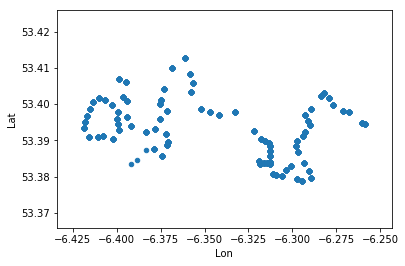

In [245]:
plotdf = schedule_out[["Lon", "Lat"]]
plotdf.plot.scatter(x="Lon", y="Lat")

In [238]:
df.JourneyPatternID.unique()

array([   1, 1001])

In [239]:
schedule_in.dtypes


trip_id                   object
arrival_time              object
departure_time            object
stop_id                   object
Name without locality     object
Name                      object
Lat                      float64
Lon                      float64
stop_sequence              int64
stop_headsign             object
shape_dist_traveled      float64
StopID                     int64
LineID                    object
Direction                 object
JourneyPatternID           int64
dtype: object

In [240]:
df_1001.dtypes

Timestamp             int64
LineID               object
JourneyPatternID      int64
TimeFrame            object
VehicleJourneyID      int64
Lon                 float64
Lat                 float64
VehicleID             int64
StopID                int64
AtStop                int64
HumanTime            object
Day                   int64
Hour                  int64
JourneyGroup         object
Runtime               int64
dtype: object